In [61]:
import pandas as pd
import json
import seaborn as sns
import numpy as np

In [153]:
with open("new_match_stats.json") as file:
    matches = json.loads(file.read())
stat_keys = matches[0]['home'].keys()
data = {}
data.update({'home_' + k: [] for k in stat_keys})
data.update({'guest_' + k: [] for k in stat_keys})

for match in matches:
    for key in match['home'].keys():
        data['home_' + key].append(match['home'][key])
    for key in match['guest'].keys():
        data['guest_' + key].append(match['guest'][key])

df = pd.DataFrame(data)
df.head()

,home_team,home_score,home_xG,home_possession,home_passing_accuracy,home_shots_on_target,home_yellow_cards_count,home_red_cards_count,home_fouls,home_corners,...,guest_crosses,guest_touches,guest_tackles,guest_interceptions,guest_aerials_won,guest_clearances,guest_offsides,guest_goal_kicks,guest_throw_ins,guest_long_balls
0,Crystal Palace,0,1.2,0.56,0.84,0.20,1,0,16,3,...,11,599,29,9,14,24,2,2,14,59
1,Fulham,2,1.2,0.33,0.60,0.25,2,0,7,4,...,18,784,11,10,13,16,4,5,35,94
2,Tottenham Hotspur,4,1.5,0.58,0.83,0.44,3,0,11,10,...,18,554,14,13,11,21,0,4,14,61
3,Newcastle United,2,1.7,0.61,0.79,0.39,0,0,9,11,...,9,475,15,10,16,37,0,12,26,70
4,Leeds United,2,0.8,0.40,0.74,0.33,2,0,13,6,...,20,720,16,14,7,17,1,9,23,72


In [154]:
df_home_score=df[['home_score','home_goal_kicks','home_passing_accuracy','home_possession']]
df_home_score.head()

,home_score,home_goal_kicks,home_passing_accuracy,home_possession
0,0,4,0.84,0.56
1,2,8,0.60,0.33
2,4,5,0.83,0.58
3,2,2,0.79,0.61
4,2,9,0.74,0.40


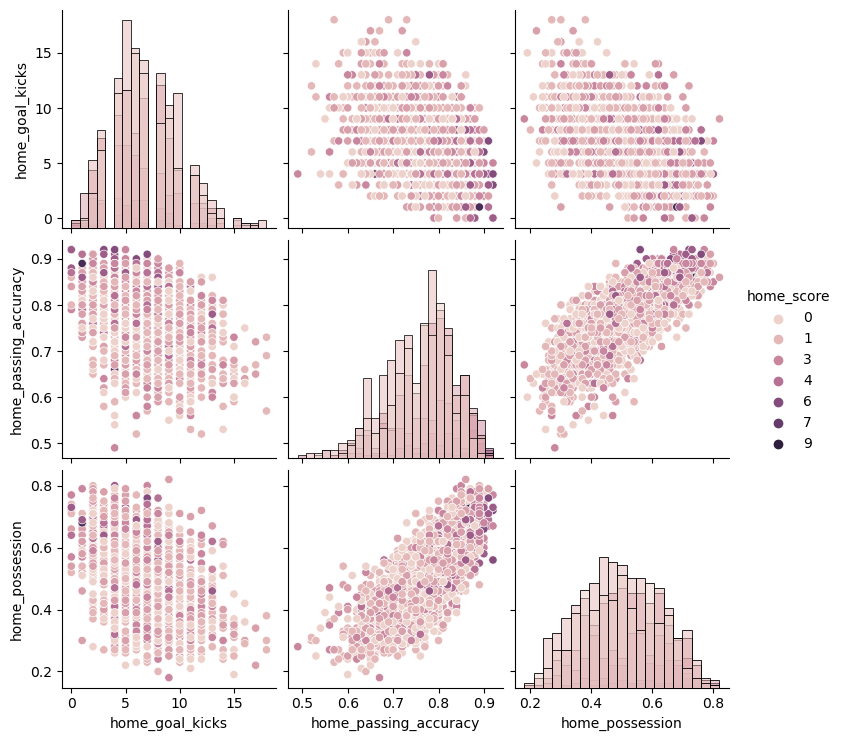

In [155]:
sns.pairplot(df_home_score,hue='home_score',diag_kind="hist")

<AxesSubplot:xlabel='home_goal_kicks', ylabel='home_shots_on_target'>

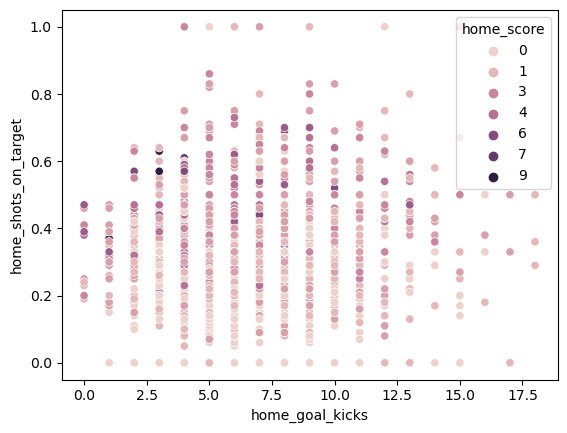

In [147]:
sns.scatterplot(data=df, x="home_goal_kicks", y="home_shots_on_target", hue="home_score")

In [156]:
df_guest_score=df[['guest_score','guest_goal_kicks','guest_passing_accuracy','guest_possession']]
df_guest_score.head()

,guest_score,guest_goal_kicks,guest_passing_accuracy,guest_possession
0,2,2,0.81,0.44
1,2,5,0.76,0.67
2,1,4,0.79,0.42
3,0,12,0.71,0.39
4,1,9,0.84,0.60


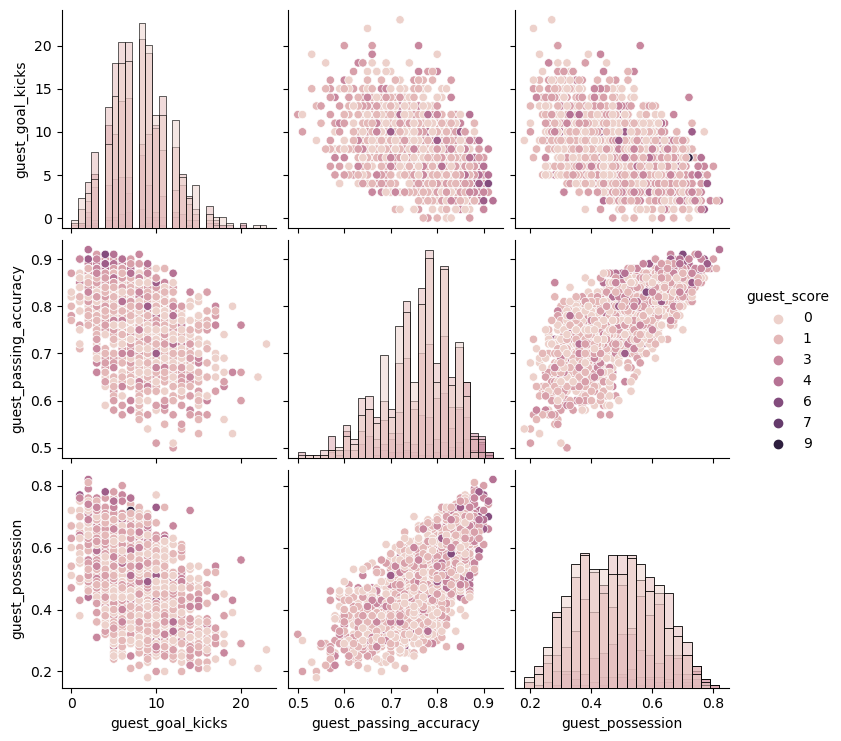

In [157]:
sns.pairplot(df_guest_score,hue='guest_score',diag_kind="hist")

<AxesSubplot:xlabel='guest_goal_kicks', ylabel='guest_shots_on_target'>

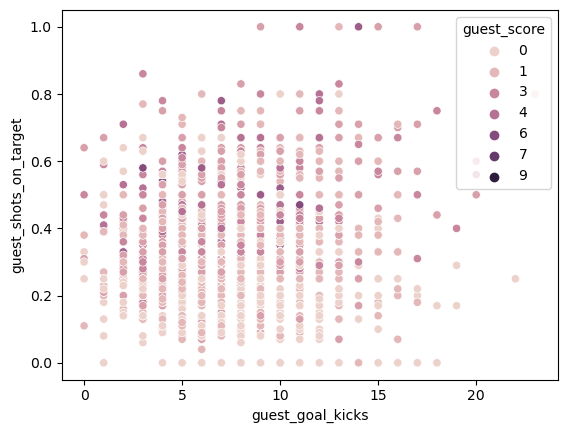

In [149]:
sns.scatterplot(data=df, x="guest_goal_kicks", y="guest_shots_on_target", hue="guest_score")

In [158]:
columns = ['Команда','Игрок','Позиция','Рост']
df_players = pd.read_table('information.tsv',sep=',', header=None,names=columns,skiprows=1)
df_players=df_players.iloc [1: , :]
df_players.loc[(df_players['Команда'] =='AFC Bournemouth'), 'Команда'] ='Bournemouth'
df_players.loc[(df_players['Команда'] =='Brighton and Hove Albion'), 'Команда'] ='Brighton & Hove Albion'
df_players.head()

,Команда,Игрок,Позиция,Рост
1,Manchester United,David de Gea,Goalkeeper,192cm
2,Manchester United,Tom Heaton,Goalkeeper,188cm
3,Manchester United,Tom Heaton,Goalkeeper,188cm
4,Manchester United,Nathan Bishop,Goalkeeper,185cm
5,Manchester United,Jack Butland,Goalkeeper,196cm


In [159]:
df_players["Рост"] = df_players["Рост"].str.replace(r"[^\d\.]", "", regex=True)
df_players["Рост"] = df_players["Рост"].astype (int)
df_players['Рост_м'] = (df_players['Рост'])/100
df_players.head()

,Команда,Игрок,Позиция,Рост,Рост_м
1,Manchester United,David de Gea,Goalkeeper,192,1.92
2,Manchester United,Tom Heaton,Goalkeeper,188,1.88
3,Manchester United,Tom Heaton,Goalkeeper,188,1.88
4,Manchester United,Nathan Bishop,Goalkeeper,185,1.85
5,Manchester United,Jack Butland,Goalkeeper,196,1.96


In [106]:
def assign_value(self):
    if str(self['Позиция']) =='Goalkeeper':
        return '0.5'
    else:
        return '1'

In [160]:
df_players['Веса'] = df_players.apply(assign_value, axis=1)
df_players.head()

,Команда,Игрок,Позиция,Рост,Рост_м,Веса
1,Manchester United,David de Gea,Goalkeeper,192,1.92,0.5
2,Manchester United,Tom Heaton,Goalkeeper,188,1.88,0.5
3,Manchester United,Tom Heaton,Goalkeeper,188,1.88,0.5
4,Manchester United,Nathan Bishop,Goalkeeper,185,1.85,0.5
5,Manchester United,Jack Butland,Goalkeeper,196,1.96,0.5


In [161]:
df_players["Веса"] = df_players["Веса"].astype (float) #добавляем веса, уменьшая вес для вратаря, чтобы далее проверить корреляцию с угловыми
mean_height = df_players.groupby('Команда').agg({'Рост': lambda x: np.average(x, weights=df_players.loc[x.index, 'Веса'])})
mean_height.head()

,Рост
Команда,
Arsenal,179.838235
Aston Villa,182.056604
Bournemouth,181.691176
Brentford,180.967213
Brighton & Hove Albion,179.322034


In [162]:
teams=mean_height.index.tolist() # создаем лист с командами для группировки

In [163]:
data=[]
for team in teams:
    corners=0
    goals=0
    tries=0
    for i in range(len(df)):
        if df['home_team'][i]==team:
            corners+=df['home_corners'][i].astype(int)
            tries+=df['home_goal_kicks'][i].astype(int)
            goals+=df['home_score'][i].astype(int)
        if df['guest_team'][i]==team:
            corners+=df['guest_corners'][i].astype(int)
            tries+=df['guest_goal_kicks'][i].astype(int)
            goals+=df['guest_score'][i].astype(int)
    data.append({'Команда': team, 'Угловые': corners,'Удары по воротам':tries,'Забито':goals})
merged=pd.DataFrame(data)
merged=merged.set_index('Команда')
merged_df = pd.merge(merged, mean_height, on='Команда', how='outer')
merged_df.head()

,Угловые,Удары по воротам,Забито,Рост
Команда,,,,
Arsenal,1049,1182,327,179.838235
Aston Villa,737,1104,192,182.056604
Bournemouth,508,908,127,181.691176
Brentford,299,529,96,180.967213
Brighton & Hove Albion,939,1250,210,179.322034


<AxesSubplot:>

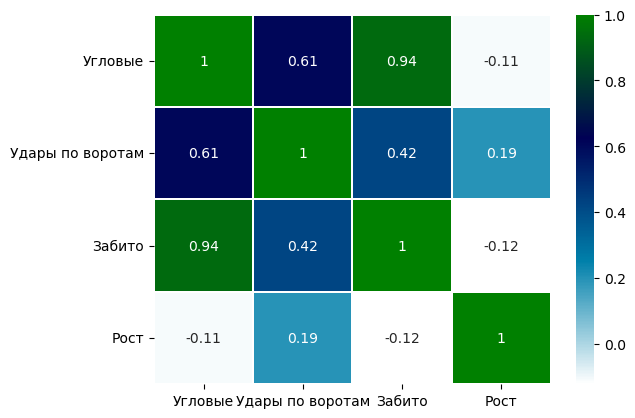

In [164]:
sns.heatmap(
    merged_df.corr(),
    annot=True,
    cmap='ocean_r',
    linewidths=0.1
)

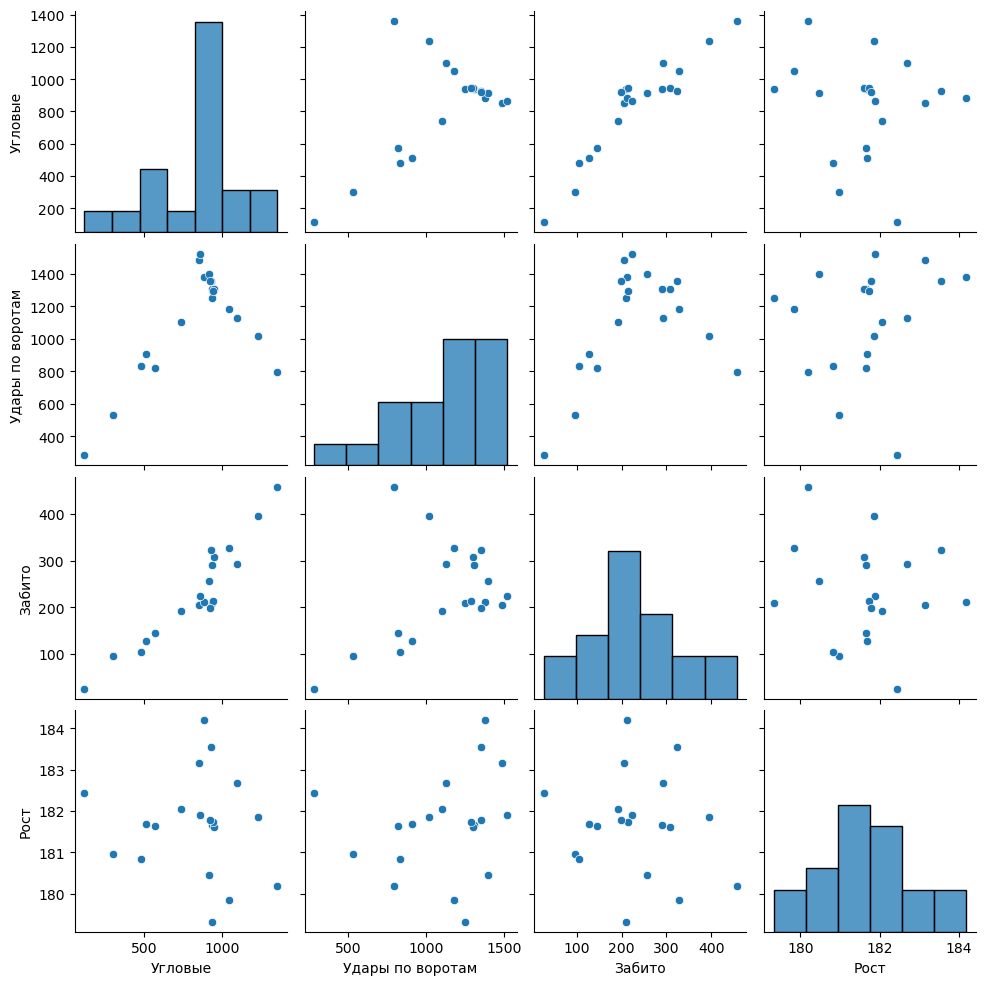

In [122]:
sns.pairplot(merged_df)

In [165]:
merged_df['Количество голов/Угловые']=merged_df['Забито']/merged_df['Угловые']
merged_df.head()

,Угловые,Удары по воротам,Забито,Рост,Количество голов/Угловые
Команда,,,,,
Arsenal,1049,1182,327,179.838235,0.311725
Aston Villa,737,1104,192,182.056604,0.260516
Bournemouth,508,908,127,181.691176,0.250000
Brentford,299,529,96,180.967213,0.321070
Brighton & Hove Albion,939,1250,210,179.322034,0.223642


<AxesSubplot:>

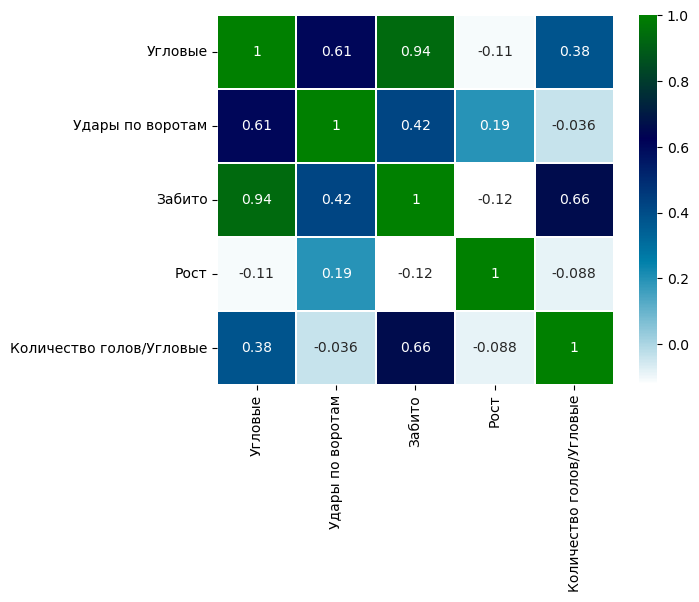

In [166]:
sns.heatmap(
    merged_df.corr(),
    annot=True,
    cmap='ocean_r',
    linewidths=0.1
)